# Pandas Sales Analysis

# Objective

These are the below objectives from this dataset.

- What is the overall sales trend?
- What are the top 10 products by sales?
- What are the most selling products?
- Which is the most preferred shipmode?
- Which are the most profitable categories and sub-categories?

### IMPORTING REQUIRED LIBRARIES

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

### IMPORTING THE DATASET

In [9]:
df = pd.read_excel('input-datasets/superstore_sales.xlsx')
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [3]:
#finding the first 5 rows of this dataset
df.head()

#finding the last 5 rows of this dataset
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


### DATA AUDIT

In [4]:
#length/size of this dataset
print(f"Size: {df.shape}")

Size: (51290, 21)


In [5]:
#descibe the dataset
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [6]:
#get some more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [7]:
#get all the columns from this dataset
list(df.columns)

['order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_name',
 'segment',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'order_priority',
 'year']

### DOING FURTHER ANALYSIS

- ### Finding the overall sales trend

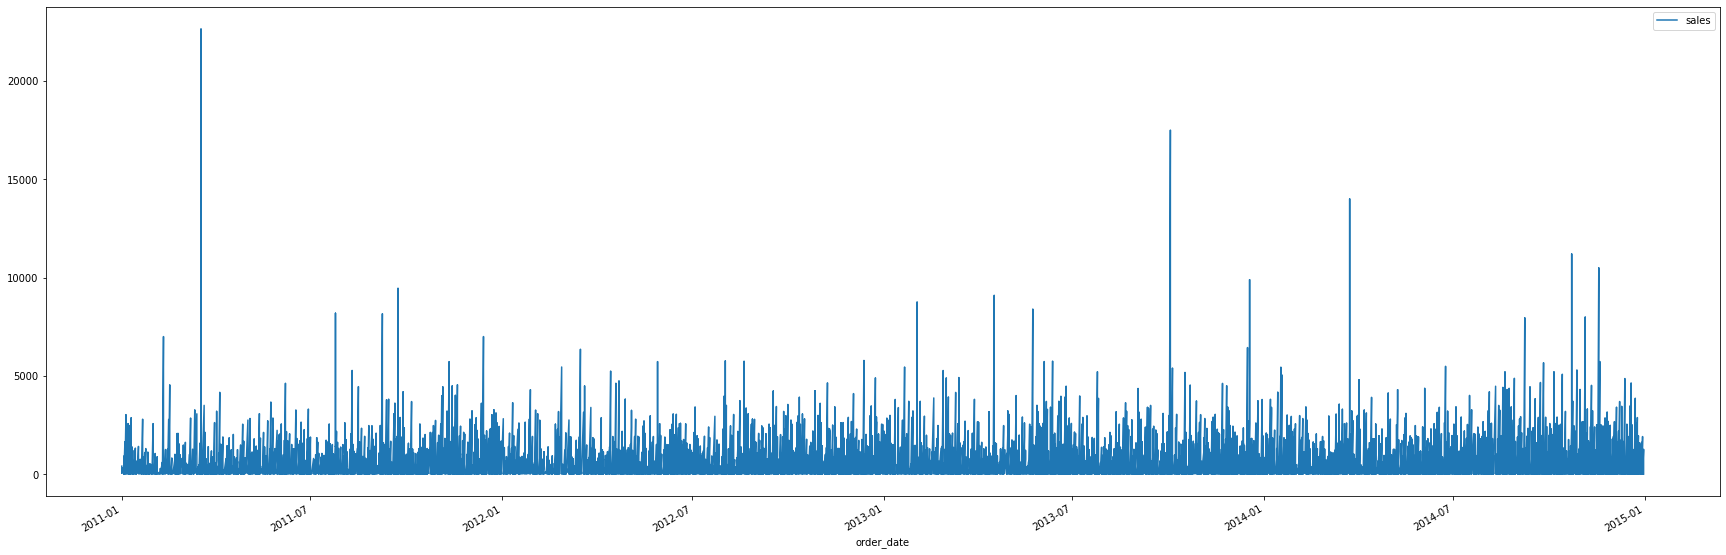

In [9]:
sales_to_order_date = df[['sales','order_date']]
df.plot(x = "order_date", y = "sales", kind = "line", figsize = (30,10))
plt.show()

In [10]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [11]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [14]:
# getting the month year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [21]:
df_monthly_trend = df.groupby('month_year').sum()['sales'].reset_index()

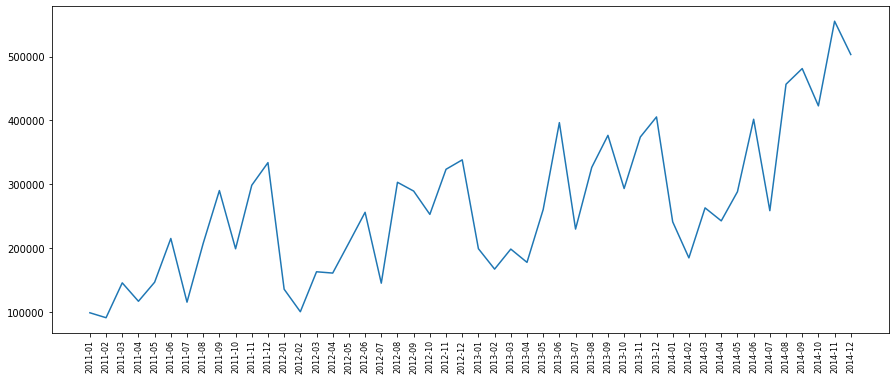

In [27]:
# Setting the figsize
plt.figure(figsize = (15,6))
plt.plot(df_monthly_trend['month_year'], df_monthly_trend['sales'])
plt.xticks(rotation = 'vertical', size= 8)
plt.show()

 - ### What are the top 10 products by sales?

In [39]:
# grouping the dataset by product name and getting thei sum
products_to_sales = df.groupby('product_name').sum()['sales'].reset_index()

# sorting the values by decending order of sales
products_to_sales.sort_values(by = 'sales', ascending = False, inplace = True)

# filtering out the top 10 selling products
products_to_sales[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


- ### Which are the most selling products?

In [54]:
# group by product name from this dataset
products_to_quantity = df.groupby('product_name').sum()['quantity'].reset_index()

# sort the dataset by the descending order of quantity
products_to_quantity.sort_values(by = 'quantity', ascending = False, inplace = True)

# getting the most selling product
products_to_quantity[:1]

,product_name,quantity
3275,Staples,876


 - ### Which is the most preferred shipmode?

In [60]:
# getting all the distinct ship modes from the dataset
ship_mode_arr = df['ship_mode'].unique()
print("All ship modes present -- >")
for mode in ship_mode_arr:
    print(mode)

All ship modes present -- >
Standard Class
Second Class
Same Day
First Class


In [67]:
# grouping the dataset by shipmode and getting each shipmode count
shipmode_to_order_ids = df.groupby('ship_mode').count()['order_id'].reset_index()

# sort the dataset by descending order of shipmode count
shipmode_to_order_ids.sort_values(by = 'order_id', ascending = False, inplace = True)

shipmode_to_order_ids[:1] 
## standard class is the most preferred ship_mode with 30K+ orders

,ship_mode,order_id
3,Standard Class,30775


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


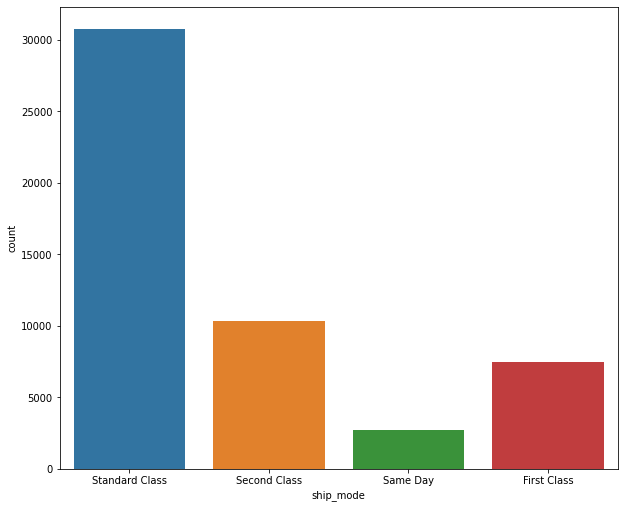

In [72]:
plt.figure(figsize = (10, 8.5))

sns.countplot(df['ship_mode'])

plt.show()

- ### Which are the most profitable catrgory and sub-category?

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [12]:
# most_profitable_data = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'].reset_index(), 
#                                     columns = {'Categories','Sub-Categories','Profit'})
# most_profitable_data.sort_values(by = 'profit', ascending = False, inplace = True)
# most_profitable_data.rename(columns = {'category': 'Categories'})
# most_profitable_data

cat_subcat_profit = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'].reset_index())
cat_subcat_profit.rename(columns = {
    'category':'Categories',
    'sub_category': 'Sub-categories',
    'profit': 'Profit'
})

,Categories,Sub-categories,Profit
0,Furniture,Bookcases,161924.41950
1,Furniture,Chairs,141973.79750
2,Furniture,Furnishings,46967.42550
3,Furniture,Tables,-64083.38870
4,Office Supplies,Appliances,141680.58940
5,Office Supplies,Art,57953.91090
6,Office Supplies,Binders,72449.84600
7,Office Supplies,Envelopes,29601.11630
8,Office Supplies,Fasteners,11525.42410
9,Office Supplies,Labels,15010.51200


## Some more in-depth analysis

- ### Whats are the locations where the most shipping cost is being incurred
- #### Location can mean state, country, market, region 

In [107]:
# group the dataset by the location values(state, country, market, region)
shipping_cost_by_location = \
pd.DataFrame(df.groupby(['state','country','market','region']).sum()['shipping_cost'].reset_index())

# sort the shipping cost in descending order
shipping_cost_by_location.sort_values(by = 'shipping_cost', ascending = False, inplace = True)

# get the top 15 such locations with max shipping charges
shipping_cost_by_location[:15]

,state,country,market,region,shipping_cost
323,England,United Kingdom,EU,North,49133.96400
193,California,United States,US,West,48600.58336
448,Ile-de-France,France,EU,Central,35528.04000
720,New York,United States,US,East,31960.94000
719,New South Wales,Australia,APAC,Oceania,28127.14000
841,Queensland,Australia,APAC,Oceania,27990.10000
739,North Rhine-Westphalia,Germany,EU,Central,21252.36000
1010,Texas,United States,US,Central,17346.40000
890,San Salvador,El Salvador,LATAM,Central,15914.87100
1064,Victoria,Australia,APAC,Oceania,15150.56000


- ### How much time it taken in for orders to get shipped to location

In [120]:
df['order_to_ship_time'] = df['ship_date'] - df['order_date']
df[['order_date', 'order_to_ship_time']]

,order_date,order_to_ship_time
0,2011-01-01,5 days
1,2011-01-01,7 days
2,2011-01-01,4 days
3,2011-01-01,4 days
4,2011-01-01,7 days
...,...,...
51285,2014-12-31,4 days
51286,2014-12-31,5 days
51287,2014-12-31,2 days
51288,2014-12-31,6 days


In [121]:
# finding the mean time taken for an order to get shipped
df['order_to_ship_time'].mean()

Timedelta('3 days 23:15:53.589393644')

In [135]:
orders_to_ship = pd.DataFrame(df[['order_date', 'order_to_ship_time']])
orders_to_ship

,order_date,order_to_ship_time
0,2011-01-01,5 days
1,2011-01-01,7 days
2,2011-01-01,4 days
3,2011-01-01,4 days
4,2011-01-01,7 days
...,...,...
51285,2014-12-31,4 days
51286,2014-12-31,5 days
51287,2014-12-31,2 days
51288,2014-12-31,6 days


In [138]:
orders_to_ship['order_year_month'] = orders_to_ship['order_date'].apply(lambda x: x.strftime('%Y-%m'))
orders_to_ship

,order_date,order_to_ship_time,order_year_month
0,2011-01-01,5 days,2011-01
1,2011-01-01,7 days,2011-01
2,2011-01-01,4 days,2011-01
3,2011-01-01,4 days,2011-01
4,2011-01-01,7 days,2011-01
...,...,...,...
51285,2014-12-31,4 days,2014-12
51286,2014-12-31,5 days,2014-12
51287,2014-12-31,2 days,2014-12
51288,2014-12-31,6 days,2014-12


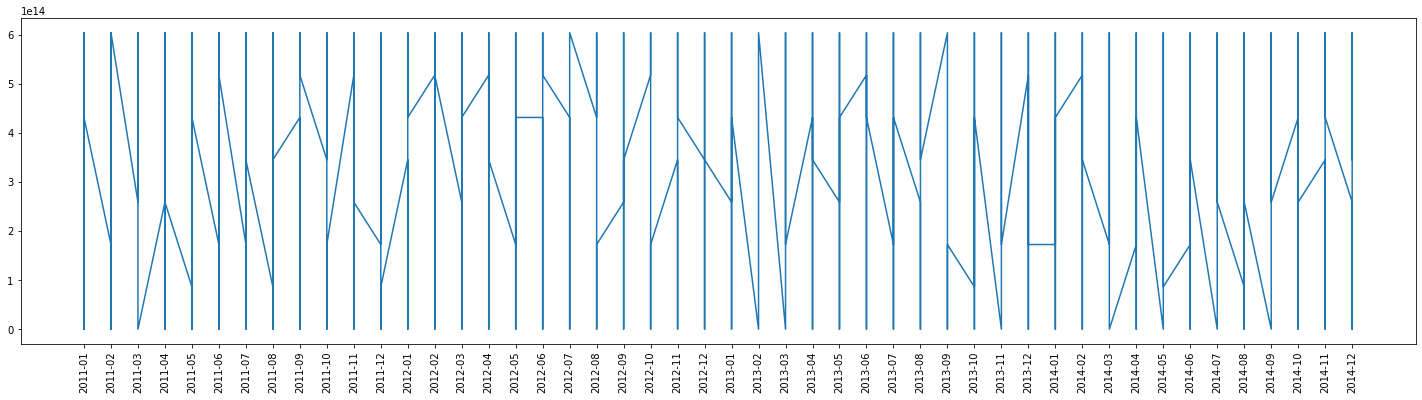

In [143]:
# Setting the figsize
plt.figure(figsize = (25,6))
plt.plot(orders_to_ship['order_year_month'], orders_to_ship['order_to_ship_time'])
plt.xticks(rotation = 'vertical', size= 10)
plt.show()

---------------